# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# **Step-1: Import the Dataset and Explore Basic Info**

In [38]:
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
print('First 5 Rows of Dataset:\n')
data.head()

First 5 Rows of Dataset:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
print('Last 5 rows:\n')
data.tail()

Last 5 rows:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [41]:
print('Shape of Dataset:')
print('Number of Rows:',data.shape[0])
print('Number of Columns:', data.shape[1])

Shape of Dataset:
Number of Rows: 891
Number of Columns: 12


In [42]:
print('Info of Dataset:')
data.info()

Info of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
print("Descriptive Statistics of Numerical columns:\n")
data.describe()

Descriptive Statistics of Numerical columns:



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Before handling the missing values**

In [44]:
# Checking the missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Step-2: Handling the missing values**

In [45]:
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace = True)
print(f"Age Column filled with median value : {median_age}")

Age Column filled with median value : 28.0


In [46]:
# Cabin' column dropped due to a high number of missing values.
data.drop('Cabin', axis = 1, inplace = True)

In [47]:
mode_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(mode_embarked, inplace=True)
print(f"'Embarked' column filled with mode value: '{mode_embarked}'")

'Embarked' column filled with mode value: 'S'


# **After Handling the missing value**

In [48]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# **Step-3: Convert categorical features into numerical using encoding**

In [49]:
# Remove the identifier columns because these have no predict power
data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [50]:
categorical_cols = ['Sex', 'Embarked']
print('After OneHotEncoding:\n')
new_data = pd.get_dummies(data, columns = categorical_cols, drop_first = True, dtype = int)
new_data

After OneHotEncoding:



,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


# **Step-4: Normalize/standardize the numerical features.**

In [51]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
print("Dataset after standardizing numerical features:\n")
new_data[numerical_cols] = scaler.fit_transform(new_data[numerical_cols])
new_data.head()

Dataset after standardizing numerical features:



,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,1,0,1
1,1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0,0,0
2,1,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0,0,1
3,1,-1.566107,0.433312,0.432793,-0.473674,0.420730,0,0,1
4,0,0.827377,0.433312,-0.474545,-0.473674,-0.486337,1,0,1


# **Step-5: Visualize outliers using boxplots and remove them.**

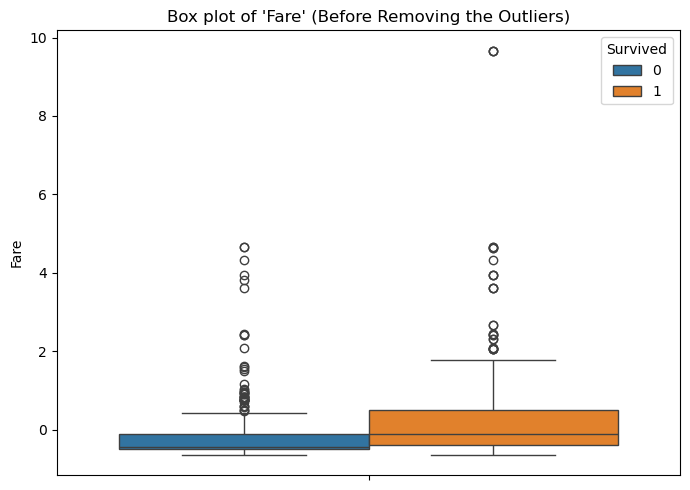

In [82]:
plt.figure(figsize = (7,5))
sns.boxplot(new_data, y = new_data['Fare'], hue = new_data['Survived'])
plt.title("Box plot of 'Fare' (Before Removing the Outliers)")
plt.tight_layout()
plt.show()

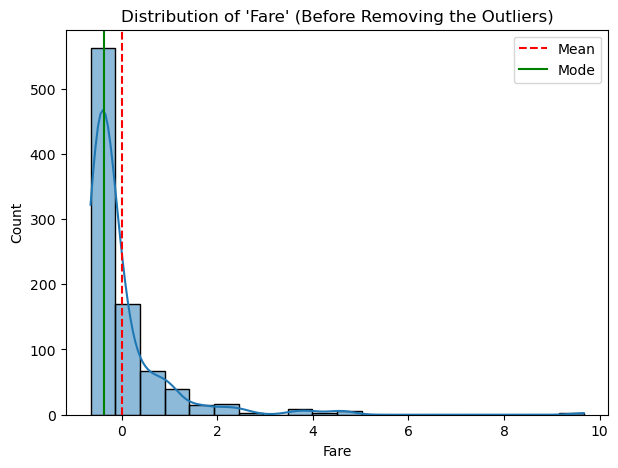

In [83]:
plt.figure(figsize = (7,5))
sns.histplot(new_data, x = new_data['Fare'],bins = 20, kde = True)
plt.title("Distribution of 'Fare' (Before Removing the Outliers)")

# calculate the mean and median values
col_mean = new_data['Fare'].mean()
col_median = new_data['Fare'].median()

plt.axvline(col_mean, color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(col_median, color = 'green', linestyle = '-', label = 'Mode')

plt.legend()
plt.show()

In [87]:
# finding the inter quartile range(IQR)
Q1 = new_data['Fare'].quantile(0.25)
Q3 = new_data['Fare'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print('IQR value:', IQR)
print('Lower_limit:', lower)
print('Upper_limit:', upper)

IQR value: 0.4649018732633316
Lower_limit: -1.18650103391317
Upper_limit: 0.6731064591401562


In [88]:
print(f"Original Shape of the Dataset: {new_data.shape}")
data_no_outliers = new_data[(new_data['Fare'] >= lower) & (new_data['Fare'] <= upper)]
print(f"Shape of dataset after removing 'Fare' outliers: {data_no_outliers.shape}")

Original Shape of the Dataset: (891, 9)
Shape of dataset after removing 'Fare' outliers: (775, 9)


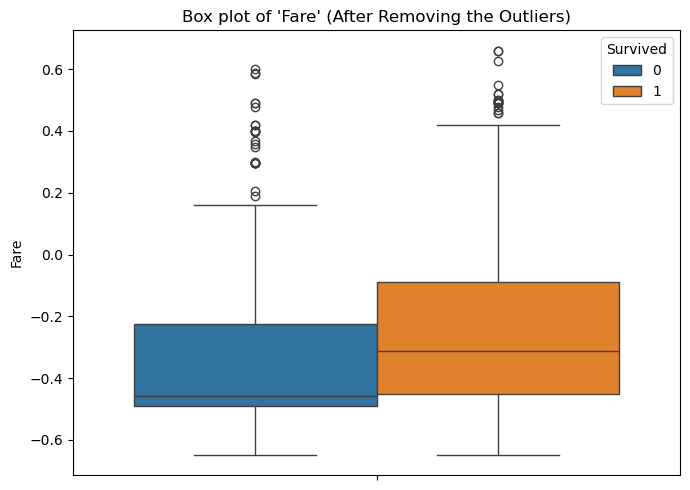

In [89]:
plt.figure(figsize = (7,5))
sns.boxplot(data_no_outliers, y = data_no_outliers['Fare'], hue = data_no_outliers['Survived'])
plt.title("Box plot of 'Fare' (After Removing the Outliers)")
plt.tight_layout()
plt.show()

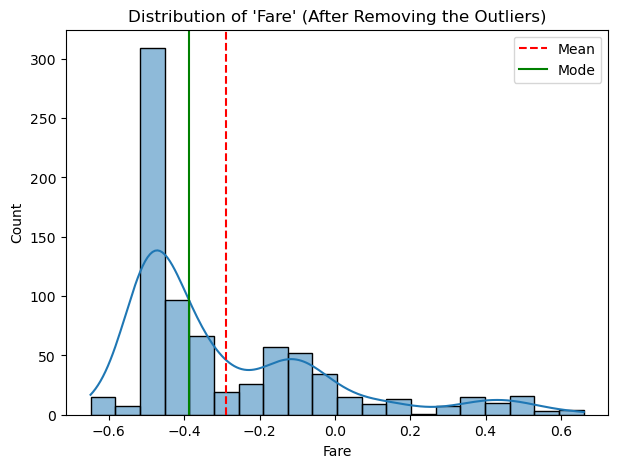

In [91]:
plt.figure(figsize = (7,5))
sns.histplot(data_no_outliers, x = data_no_outliers['Fare'],bins = 20, kde = True)
plt.title("Distribution of 'Fare' (After Removing the Outliers)")

# calculate the mean and median values
col_mean = data_no_outliers['Fare'].mean()
col_median = data_no_outliers['Fare'].median()

plt.axvline(col_mean, color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(col_median, color = 'green', linestyle = '-', label = 'Mode')

plt.legend()
plt.show()